In [1]:
from config import *

import gensim

import glob
import os
import re

import numpy as np
import pandas as pd

import json

/user/ms5941/.local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim.models import ldamodel

In [12]:
THEME = 'Volatility'
theme = 'Volatility'

In [4]:
# Load dictionary and corpus
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))

2021-04-26 00:20:22,769 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict
2021-04-26 00:20:22,783 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict', 'datetime': '2021-04-26T00:20:22.782269', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}


In [5]:
# 1. Look for ids of related words to theme in the dictionary. This will be a list of ids for each year.
# 

In [6]:
words = pd.read_csv(TEMP_PATH + '/%s_words.csv' % THEME.lower(), index_col=0)

In [7]:
year_name_list = dict()
year_id_list = dict()
for col in words.columns:
    reqd_words = list(words[col].values) + [THEME.lower()]
    reqd_ids = [k for k,v in dictionary_all.items() if v in reqd_words]
    year_name_list[col] = [dictionary_all[i] for i in reqd_ids]
    year_id_list[col] = reqd_ids

In [8]:
year_name_list

{'1996': ['volatility', 'downside', 'upside', 'trend'],
 '1997': ['volatility', 'options'],
 '1998': ['volatility', 'options', 'activity'],
 '1999': ['weakness', 'volatility', 'options'],
 '2000': ['weakness', 'volatility'],
 '2001': ['volatility', 'uncertainty'],
 '2002': ['weakness', 'volatility', 'volatile', 'uncertainty', 'strength'],
 '2003': ['weakness',
  'volatility',
  'volatile',
  'declines',
  'uncertainty',
  'exposure'],
 '2004': ['weakness', 'volatility', 'risk', 'exposure'],
 '2005': ['weakness',
  'volatility',
  'volatile',
  'risk',
  'uncertainty',
  'exposure'],
 '2006': ['weakness',
  'volatility',
  'risk',
  'uncertainty',
  'exposure',
  'upside'],
 '2007': ['weakness', 'volatility', 'uncertainty', 'upside'],
 '2008': ['volatility', 'volatile', 'upside'],
 '2009': ['volatility', 'downside', 'upside'],
 '2010': ['volatility', 'volatile', 'downside', 'upside'],
 '2011': ['weakness', 'volatility', 'volatile', 'uncertainty'],
 '2012': ['volatility', 'volatile', 'do

In [9]:
years = [str(year) for year in range(START_YEAR, END_YEAR + 1)]

In [10]:
good_words_count_per_year = dict()
for year in years:
    good_words_count_per_year[year] = []
    with open(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year)) as f:
        a = json.load(f)
        for article in a:
            good_words_count_per_year[year].append(len([word for word in article if word in year_name_list[year]]))
    print(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year), 'done!')

/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1996.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1997.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1998.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1999.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2000.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2001.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2002.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2003.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2004.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2005.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2006.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2007.json done!
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles

In [13]:
yearly_slices = []
for year in years:
    # Get the 1% threshold count (the top 1% of most relevant articles)
    x = good_words_count_per_year[year]
    x.sort()
    threshold = x[-int(len(x)*0.01):][0]
    year_article_count = 0
    with open(TOKENIZED_ARTICLES_PATH % (theme, theme, year)) as f:
        article_index = 0
        all_articles = json.load(f)
        for articles in all_articles:
            if good_words_count_per_year[year][article_index] >= threshold:
                year_article_count += 1    
            article_index += 1
    yearly_slices.append(year_article_count)
    print(TOKENIZED_ARTICLES_PATH % (theme, theme, year), 'done!')
    print('Count for the year:', year_article_count, 'Vs original:', len(all_articles))

# dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (theme, theme))

/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1996.json done!
Count for the year: 133 Vs original: 12537
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1997.json done!
Count for the year: 185 Vs original: 17826
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1998.json done!
Count for the year: 380 Vs original: 38090
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_1999.json done!
Count for the year: 260 Vs original: 23782
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2000.json done!
Count for the year: 229 Vs original: 20482
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2001.json done!
Count for the year: 306 Vs original: 17410
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2002.json done!
Count for the year: 405 Vs original: 38270
/work/ms5941/NLP/Temp/Volatility/Volatility_Articles_Tokenized_2003.json done!
Count for the year: 447 Vs original: 35783
/work/ms5941/NLP/Temp/Vo

In [14]:
sum(yearly_slices)

15234

In [15]:
with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'w') as f:
    json.dump(yearly_slices, f)

In [16]:
# with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'r') as f:
#     yearly_slices = json.load(f)

In [17]:
print(yearly_slices)

[133, 185, 380, 260, 229, 306, 405, 447, 1026, 775, 772, 645, 405, 340, 398, 507, 491, 589, 1006, 770, 462, 543, 1195, 1422, 1543]


In [18]:
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))
corpus_all = gensim.corpora.MmCorpus(TEMP_PATH + '/%s/%s_less_restricted.mm' % (THEME, THEME))


2021-04-26 00:27:48,265 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict
2021-04-26 00:27:48,267 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.dict', 'datetime': '2021-04-26T00:27:48.267234', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 00:27:48,284 : INFO : loaded corpus index from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.mm.index
2021-04-26 00:27:48,285 : INFO : initializing cython corpus reader from /work/ms5941/NLP/Temp/Volatility/Volatility_less_restricted.mm
2021-04-26 00:27:48,307 : INFO : accepted corpus with 15234 documents, 971 features, 1515531 non-zero entries


In [19]:
import numpy as np

cum_yearly_slices = np.cumsum(yearly_slices)

corpus_by_year = dict()
corpus_by_year[START_YEAR] = corpus_all[:cum_yearly_slices[0]]
for i in range(1, 25):
    corpus_by_year[START_YEAR + i] = corpus_all[cum_yearly_slices[i-1]:cum_yearly_slices[i]]

In [20]:
len(corpus_by_year[2009]) 

340

In [41]:
def get_avg_topic_probabilities(lda, corp, num_topics):
    """
    For the given LDA model and corpus, get the aggregate probability of each topic 
    (by iterating over each document in the corpus, adding up individual probabilities and aggregating)
    Then, divide by the total number of documents in the corpus to get the average 
    topic probabilities for the corpus.
    
    """
    all_topics_probabilities = np.zeros(num_topics)
    for article in corp:
        article_topics = lda.get_document_topics(article)
        topic_vec = np.zeros(num_topics)
        for k, prob in article_topics:
            topic_vec[k] = prob
        all_topics_probabilities += topic_vec
    
    # Avg topic probabilities
    avg_topic_probabilities = all_topics_probabilities/float(len(corp))
    
    return avg_topic_probabilities


def get_top_ten_topics_for_year(year, lda, avg_topic_probabilities):
    """
    Using the average topic probabilites, rank the topics and 
    return the top ten topics for a year.
    
    """
    # Get top 10 topics for each year
    indices = (-avg_topic_probabilities).argsort()[:10]

    top_topics_words = dict()
    top_topics_words[year] = dict()
    rank = 1
    for ind in indices:
        top_words = lda.show_topic(ind, topn=10)
        words, probs = zip(*top_words)
        top_topics_words[year][rank] = top_words
        rank += 1

    df = pd.DataFrame.from_dict({(i,j): [x[0] for x in top_topics_words[i][j]] for i in top_topics_words.keys() 
                            for j in top_topics_words[i].keys()}).T
    return df, top_topics_words



def get_largest_popularity_shifts(avg_topics_all, num_topics=10, passes=25, iterations=400, 
                                  eval_every=None, update_every=0, alpha='auto', eta='auto'):

    # Get topic ranks for each year
    yearly_ranks = dict()

    temp = (-avg_topics_all[0]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[0]))
    yearly_ranks[2019] = ranks

    temp = (-avg_topics_all[1]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[1]))
    yearly_ranks[2020] = ranks
    
    shift_in_popularity = yearly_ranks[2019] - yearly_ranks[2020]
    
    top_shifts = dict()
    # Top gains indices
    top_shifts['upward'] = (shift_in_popularity).argsort()[:5]
    
    # Top drops indices
    top_shifts['downward'] = (-shift_in_popularity).argsort()[:5]

    for trend in ['upward', 'downward']:
        print('Top %s shifts in popularity (2019 to 2020)' % trend)
        top_shift_topics_words = dict()
        rank = 1
        for ind in top_shifts[trend]:
            tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
            if os.path.exists(tempfile):
                lda = gensim.models.LdaModel.load(tempfile)    
            top_words = lda.show_topic(ind, topn=12)
            words, probs = zip(*top_words)
            top_shift_topics_words[rank] = top_words
            rank += 1

        display(pd.DataFrame.from_dict({x:[y[0] for y in top_shift_topics_words[x]] for x in top_shift_topics_words}).T)


In [43]:
def generate_lda_model(corpus, dictionary, num_topics=10, passes=25, 
                       iterations=400, eval_every=None, update_every=0, 
                       alpha='auto', eta='auto'):

    lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                                 iterations=iterations, num_topics=num_topics, passes=passes, 
                                 eval_every=eval_every, update_every = update_every)
    
    # Save lda model
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    lda.save(tempfile)
    
    return lda


def get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=10, passes=25, iterations=400, 
               eval_every=None, update_every=0, alpha='auto', eta='auto'):
    """
    Get the top topics for each year, based on an LDA model created using documents of both years
    
    """
    # Check if a model with the same config already exists. 
    # If it does, load the model instead of generating a new one
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    if os.path.exists(tempfile):
        lda = gensim.models.LdaModel.load(tempfile)
    else:
        lda = generate_lda_model(corpus_all, dictionary_all, num_topics, passes, 
                                 iterations, eval_every, update_every, alpha, eta)

    avg_topics_all = []
    for year in range(START_YEAR, END_YEAR + 1):
        avg_topic_probabilities = get_avg_topic_probabilities(lda, corpus_by_year[year], num_topics)
        df, top_topic_words = get_top_ten_topics_for_year(year, lda, avg_topic_probabilities)
        display(df)
        avg_topics_all.append(avg_topic_probabilities)

    # Plot avg topic distribution graphs
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].bar(range(len(avg_topics_all[0])), avg_topics_all[0]*100)
    ax[1].bar(range(len(avg_topics_all[1])), avg_topics_all[1]*100)
    plt.setp(ax)
    plt.show()

    return avg_topics_all

In [35]:
import matplotlib.pyplot as plt

2021-04-26 02:07:09,915 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto
2021-04-26 02:07:09,916 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 02:07:09,918 : INFO : setting ignored attribute dispatcher to None
2021-04-26 02:07:09,919 : INFO : setting ignored attribute state to None
2021-04-26 02:07:09,919 : INFO : setting ignored attribute id2word to None
2021-04-26 02:07:09,919 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto', 'datetime': '2021-04-26T02:07:09.919786', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 02:07:09,920 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_4

0         1            2        3           4           5  \
1996 1     futures     cents        crude  traders     trading      demand   
     2         yen  currency          end     gold      dollar         low   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4   president    united   government   people        time      states   
     5     capital       tax         cash  service     revenue     ratings   
     6        unit   planned         city    south       power       plant   
     7        open     close        total      low  securities       notes   
     8      metals     codes  commodities     gold       crude    exchange   
     9        ftse     basic        asian     help        live  indicators   
     10      diary       ecb          int   events        poll     reserve   

                  6          7           8         9  
1996 1      average    chicago         gas   weather  
     2         next       rose       yield       two  
     3       points       rose     average     trade  
     4   washington        two       state   editing  
     5         term  operating      fiscal  business  
     6     affirmed    balance         big      base  
     7          due  available  volatility      high  
     8        brent        mtl        cash     paper  
     9       wealth      phone       visit    equity  
     10       swiss        boj         fed     japan

0         1            2        3           4           5  \
1997 1         yen  currency          end     gold      dollar         low   
     2      nasdaq    shares        stock      dow      stocks     trading   
     3     futures     cents        crude  traders     trading      demand   
     4   president    united   government   people        time      states   
     5     capital       tax         cash  service     revenue     ratings   
     6        open     close        total      low  securities       notes   
     7      metals     codes  commodities     gold       crude    exchange   
     8        unit   planned         city    south       power       plant   
     9       diary       ecb          int   events        poll     reserve   
     10       ftse     basic        asian     help        live  indicators   

                  6          7           8         9  
1997 1         next       rose       yield       two  
     2       points       rose     average     trade  
     3      average    chicago         gas   weather  
     4   washington        two       state   editing  
     5         term  operating      fiscal  business  
     6          due  available  volatility      high  
     7        brent        mtl        cash     paper  
     8     affirmed    balance         big      base  
     9        swiss        boj         fed     japan  
     10      wealth      phone       visit    equity

0         1            2        3           4           5  \
1998 1         yen  currency          end     gold      dollar         low   
     2     futures     cents        crude  traders     trading      demand   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4   president    united   government   people        time      states   
     5     capital       tax         cash  service     revenue     ratings   
     6        open     close        total      low  securities       notes   
     7      metals     codes  commodities     gold       crude    exchange   
     8        unit   planned         city    south       power       plant   
     9       diary       ecb          int   events        poll     reserve   
     10       ftse     basic        asian     help        live  indicators   

                  6          7           8         9  
1998 1         next       rose       yield       two  
     2      average    chicago         gas   weather  
     3       points       rose     average     trade  
     4   washington        two       state   editing  
     5         term  operating      fiscal  business  
     6          due  available  volatility      high  
     7        brent        mtl        cash     paper  
     8     affirmed    balance         big      base  
     9        swiss        boj         fed     japan  
     10      wealth      phone       visit    equity

0         1            2        3           4           5  \
1999 1         yen  currency          end     gold      dollar         low   
     2     futures     cents        crude  traders     trading      demand   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4     capital       tax         cash  service     revenue     ratings   
     5   president    united   government   people        time      states   
     6       diary       ecb          int   events        poll     reserve   
     7        open     close        total      low  securities       notes   
     8        unit   planned         city    south       power       plant   
     9      metals     codes  commodities     gold       crude    exchange   
     10       ftse     basic        asian     help        live  indicators   

                  6          7           8         9  
1999 1         next       rose       yield       two  
     2      average    chicago         gas   weather  
     3       points       rose     average     trade  
     4         term  operating      fiscal  business  
     5   washington        two       state   editing  
     6        swiss        boj         fed     japan  
     7          due  available  volatility      high  
     8     affirmed    balance         big      base  
     9        brent        mtl        cash     paper  
     10      wealth      phone       visit    equity

0         1            2        3           4           5  \
2000 1         yen  currency          end     gold      dollar         low   
     2      nasdaq    shares        stock      dow      stocks     trading   
     3     futures     cents        crude  traders     trading      demand   
     4     capital       tax         cash  service     revenue     ratings   
     5   president    united   government   people        time      states   
     6       diary       ecb          int   events        poll     reserve   
     7        open     close        total      low  securities       notes   
     8        unit   planned         city    south       power       plant   
     9      metals     codes  commodities     gold       crude    exchange   
     10       ftse     basic        asian     help        live  indicators   

                  6          7           8         9  
2000 1         next       rose       yield       two  
     2       points       rose     average     trade  
     3      average    chicago         gas   weather  
     4         term  operating      fiscal  business  
     5   washington        two       state   editing  
     6        swiss        boj         fed     japan  
     7          due  available  volatility      high  
     8     affirmed    balance         big      base  
     9        brent        mtl        cash     paper  
     10      wealth      phone       visit    equity

0         1            2        3           4           5  \
2001 1         yen  currency          end     gold      dollar         low   
     2   president    united   government   people        time      states   
     3     capital       tax         cash  service     revenue     ratings   
     4     futures     cents        crude  traders     trading      demand   
     5      nasdaq    shares        stock      dow      stocks     trading   
     6       diary       ecb          int   events        poll     reserve   
     7        open     close        total      low  securities       notes   
     8      metals     codes  commodities     gold       crude    exchange   
     9        unit   planned         city    south       power       plant   
     10       ftse     basic        asian     help        live  indicators   

                  6          7           8         9  
2001 1         next       rose       yield       two  
     2   washington        two       state   editing  
     3         term  operating      fiscal  business  
     4      average    chicago         gas   weather  
     5       points       rose     average     trade  
     6        swiss        boj         fed     japan  
     7          due  available  volatility      high  
     8        brent        mtl        cash     paper  
     9     affirmed    balance         big      base  
     10      wealth      phone       visit    equity

0         1            2        3           4           5  \
2002 1         yen  currency          end     gold      dollar         low   
     2   president    united   government   people        time      states   
     3     futures     cents        crude  traders     trading      demand   
     4      nasdaq    shares        stock      dow      stocks     trading   
     5     capital       tax         cash  service     revenue     ratings   
     6       diary       ecb          int   events        poll     reserve   
     7        open     close        total      low  securities       notes   
     8      metals     codes  commodities     gold       crude    exchange   
     9        unit   planned         city    south       power       plant   
     10       ftse     basic        asian     help        live  indicators   

                  6          7           8         9  
2002 1         next       rose       yield       two  
     2   washington        two       state   editing  
     3      average    chicago         gas   weather  
     4       points       rose     average     trade  
     5         term  operating      fiscal  business  
     6        swiss        boj         fed     japan  
     7          due  available  volatility      high  
     8        brent        mtl        cash     paper  
     9     affirmed    balance         big      base  
     10      wealth      phone       visit    equity

0         1            2        3           4           5  \
2003 1     futures     cents        crude  traders     trading      demand   
     2         yen  currency          end     gold      dollar         low   
     3   president    united   government   people        time      states   
     4     capital       tax         cash  service     revenue     ratings   
     5        ftse     basic        asian     help        live  indicators   
     6      nasdaq    shares        stock      dow      stocks     trading   
     7       diary       ecb          int   events        poll     reserve   
     8        open     close        total      low  securities       notes   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2003 1      average    chicago         gas   weather  
     2         next       rose       yield       two  
     3   washington        two       state   editing  
     4         term  operating      fiscal  business  
     5       wealth      phone       visit    equity  
     6       points       rose     average     trade  
     7        swiss        boj         fed     japan  
     8          due  available  volatility      high  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2004 1     capital       tax         cash  service     revenue     ratings   
     2         yen  currency          end     gold      dollar         low   
     3   president    united   government   people        time      states   
     4      nasdaq    shares        stock      dow      stocks     trading   
     5     futures     cents        crude  traders     trading      demand   
     6        ftse     basic        asian     help        live  indicators   
     7        open     close        total      low  securities       notes   
     8       diary       ecb          int   events        poll     reserve   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2004 1         term  operating      fiscal  business  
     2         next       rose       yield       two  
     3   washington        two       state   editing  
     4       points       rose     average     trade  
     5      average    chicago         gas   weather  
     6       wealth      phone       visit    equity  
     7          due  available  volatility      high  
     8        swiss        boj         fed     japan  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2005 1     capital       tax         cash  service     revenue     ratings   
     2         yen  currency          end     gold      dollar         low   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4   president    united   government   people        time      states   
     5     futures     cents        crude  traders     trading      demand   
     6        open     close        total      low  securities       notes   
     7        ftse     basic        asian     help        live  indicators   
     8       diary       ecb          int   events        poll     reserve   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2005 1         term  operating      fiscal  business  
     2         next       rose       yield       two  
     3       points       rose     average     trade  
     4   washington        two       state   editing  
     5      average    chicago         gas   weather  
     6          due  available  volatility      high  
     7       wealth      phone       visit    equity  
     8        swiss        boj         fed     japan  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2006 1     capital       tax         cash  service     revenue     ratings   
     2   president    united   government   people        time      states   
     3         yen  currency          end     gold      dollar         low   
     4     futures     cents        crude  traders     trading      demand   
     5      nasdaq    shares        stock      dow      stocks     trading   
     6        open     close        total      low  securities       notes   
     7        ftse     basic        asian     help        live  indicators   
     8       diary       ecb          int   events        poll     reserve   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2006 1         term  operating      fiscal  business  
     2   washington        two       state   editing  
     3         next       rose       yield       two  
     4      average    chicago         gas   weather  
     5       points       rose     average     trade  
     6          due  available  volatility      high  
     7       wealth      phone       visit    equity  
     8        swiss        boj         fed     japan  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2007 1         yen  currency          end     gold      dollar         low   
     2     futures     cents        crude  traders     trading      demand   
     3     capital       tax         cash  service     revenue     ratings   
     4      nasdaq    shares        stock      dow      stocks     trading   
     5   president    united   government   people        time      states   
     6       diary       ecb          int   events        poll     reserve   
     7        ftse     basic        asian     help        live  indicators   
     8        unit   planned         city    south       power       plant   
     9        open     close        total      low  securities       notes   
     10     metals     codes  commodities     gold       crude    exchange   

                  6          7           8         9  
2007 1         next       rose       yield       two  
     2      average    chicago         gas   weather  
     3         term  operating      fiscal  business  
     4       points       rose     average     trade  
     5   washington        two       state   editing  
     6        swiss        boj         fed     japan  
     7       wealth      phone       visit    equity  
     8     affirmed    balance         big      base  
     9          due  available  volatility      high  
     10       brent        mtl        cash     paper

0         1            2        3           4           5  \
2008 1         yen  currency          end     gold      dollar         low   
     2     futures     cents        crude  traders     trading      demand   
     3     capital       tax         cash  service     revenue     ratings   
     4      nasdaq    shares        stock      dow      stocks     trading   
     5   president    united   government   people        time      states   
     6        ftse     basic        asian     help        live  indicators   
     7        open     close        total      low  securities       notes   
     8      metals     codes  commodities     gold       crude    exchange   
     9       diary       ecb          int   events        poll     reserve   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2008 1         next       rose       yield       two  
     2      average    chicago         gas   weather  
     3         term  operating      fiscal  business  
     4       points       rose     average     trade  
     5   washington        two       state   editing  
     6       wealth      phone       visit    equity  
     7          due  available  volatility      high  
     8        brent        mtl        cash     paper  
     9        swiss        boj         fed     japan  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2009 1   president    united   government   people        time      states   
     2         yen  currency          end     gold      dollar         low   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4     futures     cents        crude  traders     trading      demand   
     5     capital       tax         cash  service     revenue     ratings   
     6        open     close        total      low  securities       notes   
     7      metals     codes  commodities     gold       crude    exchange   
     8       diary       ecb          int   events        poll     reserve   
     9        ftse     basic        asian     help        live  indicators   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2009 1   washington        two       state   editing  
     2         next       rose       yield       two  
     3       points       rose     average     trade  
     4      average    chicago         gas   weather  
     5         term  operating      fiscal  business  
     6          due  available  volatility      high  
     7        brent        mtl        cash     paper  
     8        swiss        boj         fed     japan  
     9       wealth      phone       visit    equity  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2010 1         yen  currency          end     gold      dollar         low   
     2      nasdaq    shares        stock      dow      stocks     trading   
     3     futures     cents        crude  traders     trading      demand   
     4        ftse     basic        asian     help        live  indicators   
     5     capital       tax         cash  service     revenue     ratings   
     6   president    united   government   people        time      states   
     7       diary       ecb          int   events        poll     reserve   
     8        open     close        total      low  securities       notes   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2010 1         next       rose       yield       two  
     2       points       rose     average     trade  
     3      average    chicago         gas   weather  
     4       wealth      phone       visit    equity  
     5         term  operating      fiscal  business  
     6   washington        two       state   editing  
     7        swiss        boj         fed     japan  
     8          due  available  volatility      high  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2011 1         yen  currency          end     gold      dollar         low   
     2     futures     cents        crude  traders     trading      demand   
     3   president    united   government   people        time      states   
     4        ftse     basic        asian     help        live  indicators   
     5      nasdaq    shares        stock      dow      stocks     trading   
     6     capital       tax         cash  service     revenue     ratings   
     7       diary       ecb          int   events        poll     reserve   
     8        open     close        total      low  securities       notes   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2011 1         next       rose       yield       two  
     2      average    chicago         gas   weather  
     3   washington        two       state   editing  
     4       wealth      phone       visit    equity  
     5       points       rose     average     trade  
     6         term  operating      fiscal  business  
     7        swiss        boj         fed     japan  
     8          due  available  volatility      high  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2012 1        ftse     basic        asian     help        live  indicators   
     2         yen  currency          end     gold      dollar         low   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4   president    united   government   people        time      states   
     5     futures     cents        crude  traders     trading      demand   
     6     capital       tax         cash  service     revenue     ratings   
     7       diary       ecb          int   events        poll     reserve   
     8        open     close        total      low  securities       notes   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2012 1       wealth      phone       visit    equity  
     2         next       rose       yield       two  
     3       points       rose     average     trade  
     4   washington        two       state   editing  
     5      average    chicago         gas   weather  
     6         term  operating      fiscal  business  
     7        swiss        boj         fed     japan  
     8          due  available  volatility      high  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2013 1     futures     cents        crude  traders     trading      demand   
     2         yen  currency          end     gold      dollar         low   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4     capital       tax         cash  service     revenue     ratings   
     5   president    united   government   people        time      states   
     6        open     close        total      low  securities       notes   
     7        ftse     basic        asian     help        live  indicators   
     8      metals     codes  commodities     gold       crude    exchange   
     9       diary       ecb          int   events        poll     reserve   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2013 1      average    chicago         gas   weather  
     2         next       rose       yield       two  
     3       points       rose     average     trade  
     4         term  operating      fiscal  business  
     5   washington        two       state   editing  
     6          due  available  volatility      high  
     7       wealth      phone       visit    equity  
     8        brent        mtl        cash     paper  
     9        swiss        boj         fed     japan  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2014 1        ftse     basic        asian     help        live  indicators   
     2         yen  currency          end     gold      dollar         low   
     3   president    united   government   people        time      states   
     4     futures     cents        crude  traders     trading      demand   
     5     capital       tax         cash  service     revenue     ratings   
     6      nasdaq    shares        stock      dow      stocks     trading   
     7        open     close        total      low  securities       notes   
     8       diary       ecb          int   events        poll     reserve   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2014 1       wealth      phone       visit    equity  
     2         next       rose       yield       two  
     3   washington        two       state   editing  
     4      average    chicago         gas   weather  
     5         term  operating      fiscal  business  
     6       points       rose     average     trade  
     7          due  available  volatility      high  
     8        swiss        boj         fed     japan  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2015 1        ftse     basic        asian     help        live  indicators   
     2         yen  currency          end     gold      dollar         low   
     3     futures     cents        crude  traders     trading      demand   
     4   president    united   government   people        time      states   
     5     capital       tax         cash  service     revenue     ratings   
     6      nasdaq    shares        stock      dow      stocks     trading   
     7        open     close        total      low  securities       notes   
     8       diary       ecb          int   events        poll     reserve   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2015 1       wealth      phone       visit    equity  
     2         next       rose       yield       two  
     3      average    chicago         gas   weather  
     4   washington        two       state   editing  
     5         term  operating      fiscal  business  
     6       points       rose     average     trade  
     7          due  available  volatility      high  
     8        swiss        boj         fed     japan  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2016 1        ftse     basic        asian     help        live  indicators   
     2         yen  currency          end     gold      dollar         low   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4     futures     cents        crude  traders     trading      demand   
     5   president    united   government   people        time      states   
     6       diary       ecb          int   events        poll     reserve   
     7     capital       tax         cash  service     revenue     ratings   
     8        open     close        total      low  securities       notes   
     9      metals     codes  commodities     gold       crude    exchange   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2016 1       wealth      phone       visit    equity  
     2         next       rose       yield       two  
     3       points       rose     average     trade  
     4      average    chicago         gas   weather  
     5   washington        two       state   editing  
     6        swiss        boj         fed     japan  
     7         term  operating      fiscal  business  
     8          due  available  volatility      high  
     9        brent        mtl        cash     paper  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2017 1     capital       tax         cash  service     revenue     ratings   
     2   president    united   government   people        time      states   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4         yen  currency          end     gold      dollar         low   
     5     futures     cents        crude  traders     trading      demand   
     6        ftse     basic        asian     help        live  indicators   
     7        open     close        total      low  securities       notes   
     8        unit   planned         city    south       power       plant   
     9      metals     codes  commodities     gold       crude    exchange   
     10      diary       ecb          int   events        poll     reserve   

                  6          7           8         9  
2017 1         term  operating      fiscal  business  
     2   washington        two       state   editing  
     3       points       rose     average     trade  
     4         next       rose       yield       two  
     5      average    chicago         gas   weather  
     6       wealth      phone       visit    equity  
     7          due  available  volatility      high  
     8     affirmed    balance         big      base  
     9        brent        mtl        cash     paper  
     10       swiss        boj         fed     japan

0         1            2        3           4           5  \
2018 1        ftse     basic        asian     help        live  indicators   
     2      nasdaq    shares        stock      dow      stocks     trading   
     3     futures     cents        crude  traders     trading      demand   
     4         yen  currency          end     gold      dollar         low   
     5   president    united   government   people        time      states   
     6       diary       ecb          int   events        poll     reserve   
     7        open     close        total      low  securities       notes   
     8      metals     codes  commodities     gold       crude    exchange   
     9     capital       tax         cash  service     revenue     ratings   
     10       unit   planned         city    south       power       plant   

                  6          7           8         9  
2018 1       wealth      phone       visit    equity  
     2       points       rose     average     trade  
     3      average    chicago         gas   weather  
     4         next       rose       yield       two  
     5   washington        two       state   editing  
     6        swiss        boj         fed     japan  
     7          due  available  volatility      high  
     8        brent        mtl        cash     paper  
     9         term  operating      fiscal  business  
     10    affirmed    balance         big      base

0         1            2        3           4           5  \
2019 1        ftse     basic        asian     help        live  indicators   
     2     futures     cents        crude  traders     trading      demand   
     3   president    united   government   people        time      states   
     4      nasdaq    shares        stock      dow      stocks     trading   
     5         yen  currency          end     gold      dollar         low   
     6        open     close        total      low  securities       notes   
     7     capital       tax         cash  service     revenue     ratings   
     8      metals     codes  commodities     gold       crude    exchange   
     9        unit   planned         city    south       power       plant   
     10      diary       ecb          int   events        poll     reserve   

                  6          7           8         9  
2019 1       wealth      phone       visit    equity  
     2      average    chicago         gas   weather  
     3   washington        two       state   editing  
     4       points       rose     average     trade  
     5         next       rose       yield       two  
     6          due  available  volatility      high  
     7         term  operating      fiscal  business  
     8        brent        mtl        cash     paper  
     9     affirmed    balance         big      base  
     10       swiss        boj         fed     japan

0         1            2        3           4           5  \
2020 1        ftse     basic        asian     help        live  indicators   
     2   president    united   government   people        time      states   
     3      nasdaq    shares        stock      dow      stocks     trading   
     4     futures     cents        crude  traders     trading      demand   
     5        open     close        total      low  securities       notes   
     6     capital       tax         cash  service     revenue     ratings   
     7         yen  currency          end     gold      dollar         low   
     8       diary       ecb          int   events        poll     reserve   
     9        unit   planned         city    south       power       plant   
     10     metals     codes  commodities     gold       crude    exchange   

                  6          7           8         9  
2020 1       wealth      phone       visit    equity  
     2   washington        two       state   editing  
     3       points       rose     average     trade  
     4      average    chicago         gas   weather  
     5          due  available  volatility      high  
     6         term  operating      fiscal  business  
     7         next       rose       yield       two  
     8        swiss        boj         fed     japan  
     9     affirmed    balance         big      base  
     10       brent        mtl        cash     paper

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

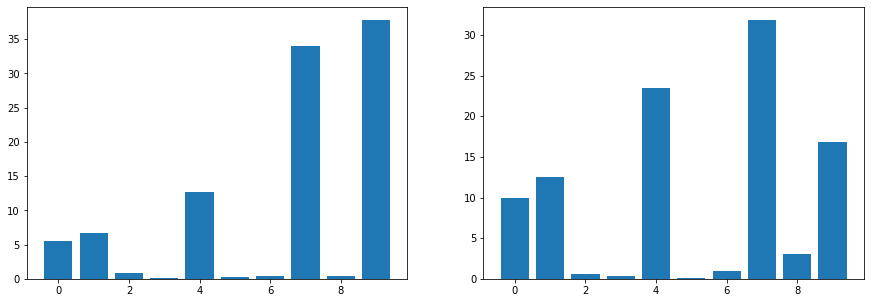

In [44]:
avg_topics_all = get_topics(corpus_all, dictionary_all, corpus_by_year)

In [42]:
get_largest_popularity_shifts(avg_topics_all, num_topics=10)

2021-04-26 02:00:22,812 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto
2021-04-26 02:00:22,813 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 02:00:22,815 : INFO : setting ignored attribute dispatcher to None
2021-04-26 02:00:22,816 : INFO : setting ignored attribute state to None
2021-04-26 02:00:22,816 : INFO : setting ignored attribute id2word to None
2021-04-26 02:00:22,816 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto', 'datetime': '2021-04-26T02:00:22.816883', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 02:00:22,817 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_4

Top upward shifts in popularity (2019 to 2020)


,0,1,2,3,4,5,6,7,8,9,10,11
1,unit,planned,city,south,power,plant,affirmed,balance,big,base,recovery,limited
2,futures,cents,crude,traders,trading,demand,average,chicago,gas,weather,cut,volume
3,ftse,basic,asian,help,live,indicators,wealth,phone,visit,equity,pages,stocks
4,capital,tax,cash,service,revenue,ratings,term,operating,fiscal,business,state,billion
5,president,united,government,people,time,states,washington,two,state,editing,minister,told


2021-04-26 02:00:22,871 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto
2021-04-26 02:00:22,872 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 02:00:22,873 : INFO : setting ignored attribute dispatcher to None
2021-04-26 02:00:22,874 : INFO : setting ignored attribute state to None
2021-04-26 02:00:22,874 : INFO : setting ignored attribute id2word to None
2021-04-26 02:00:22,874 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_400_auto_auto', 'datetime': '2021-04-26T02:00:22.874867', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 02:00:22,875 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Volatility/Volatility_LDA_model_10_25_4

Top downward shifts in popularity (2019 to 2020)


,0,1,2,3,4,5,6,7,8,9,10,11
1,diary,ecb,int,events,poll,reserve,swiss,boj,fed,japan,central,federal
2,nasdaq,shares,stock,dow,stocks,trading,points,rose,average,trade,calls,fell
3,metals,codes,commodities,gold,crude,exchange,brent,mtl,cash,paper,gro,european
4,yen,currency,end,gold,dollar,low,next,rose,yield,two,london,around
5,open,close,total,low,securities,notes,due,available,volatility,high,issued,risk
